## Housing Case Study
Problem Statement:

Consider a real estate company that has a dataset containing the prices of properties in the Delhi region. It wishes to use the data to optimise the sale prices of the properties based on important factors such as area, bedrooms, parking, etc.

Essentially, the company wants —

To identify the variables affecting house prices, e.g. area, number of rooms, bathrooms, etc.

To create a linear model that quantitatively relates house prices with variables such as number of rooms, area, number of bathrooms, etc.

To know the accuracy of the model, i.e. how well these variables can predict house prices.

In [2]:
#1 Import necessery libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#1 Import the dataset (Housing.csv) and look at the top five rows
df = pd.read_csv('Housing.csv')
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
#2 Check the shape of the DataFrame (rows, columns)
df.shape

(545, 13)

In [5]:
#3 Look at the data types of the columns
df.dtypes

price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object

In [6]:
#4 Check for missing  values if any, replace with appropriate values
missing_values = df.isnull().sum()

# Print missing values count
print("Missing Values Count:\n", missing_values)

# Handle missing values
for column in df.columns:
    if df[column].isnull().sum() > 0:  # If column has missing values
        if df[column].dtype == "object":  # If categorical, fill with mode
            df[column].fillna(df[column].mode()[0], inplace=True)
        else:  # If numerical, fill with mean
            df[column].fillna(df[column].mean(), inplace=True)

# Verify if missing values are handled
print("\nMissing Values After Handling:\n", df.isnull().sum())

Missing Values Count:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Missing Values After Handling:
 price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [7]:
#5 Prepare  X (independent variables) and y (dependent variable)
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

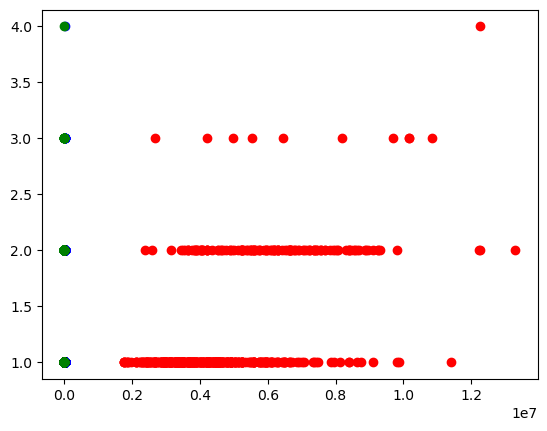

In [8]:
#6 Visualise the relationship between the independent variables and the depenedent variable using scatterplots
plt.scatter(df.iloc[:,0], df.iloc[:,3], color = 'red')
plt.scatter(df.iloc[:,1], df.iloc[:,3], color = 'blue')
plt.scatter(df.iloc[:,2], df.iloc[:,3], color = 'green')
plt.show()

In [13]:
#7 Encoding categorical data in X
print("Columns in dataset:", df.columns.tolist())

# Clean column names by stripping spaces (if any)
df.columns = df.columns.str.strip()

# Verify if "Price" exists
if "price" not in df.columns:
    raise ValueError("Error: 'Price' column not found in dataset. Check column names.")

# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Initialize encoders
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False, drop="first")

# Encoding categorical variables in X
X = df.drop(columns=["price"])  # Drop target column
y = df["price"]  # Target variable

for col in categorical_cols:
    if col in X.columns:
        if X[col].nunique() <= 2:  # If only 2 unique values, use Label Encoding
            X[col] = label_encoder.fit_transform(X[col])
        else:  # Use One-Hot Encoding for more than 2 unique values
            encoded_data = one_hot_encoder.fit_transform(X[[col]])
            encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out([col]))
            X = pd.concat([X.drop(columns=[col]), encoded_df], axis=1)

# Print transformed dataset
print("\nTransformed X (First 5 Rows):\n", X.head())

Columns in dataset: ['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']
Categorical Columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

Transformed X (First 5 Rows):
    area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  \
0                0                1        2         1   
1                0                1        3         0   
2                0                0     

/home/user/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [15]:
#8  Avoiding the Dummy Variable Trap
df.columns = df.columns.str.strip()

# Identify categorical columns
categorical_cols = df.select_dtypes(include=["object"]).columns.tolist()
print("Categorical Columns:", categorical_cols)

# Initialize encoders
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False, drop="first")  # Drop first column to avoid dummy variable trap

# Define X (features) and y (target)
if "price" in df.columns:
    X = df.drop(columns=["price"])  # Drop target column
    y = df["price"]
else:
    raise ValueError("Error: 'Price' column not found in dataset. Check column names.")

# Apply encoding
for col in categorical_cols:
    if col in X.columns:
        if X[col].nunique() <= 2:  # If only 2 unique values, use Label Encoding
            X[col] = label_encoder.fit_transform(X[col])
        else:  # Use One-Hot Encoding for more than 2 unique values
            encoded_data = one_hot_encoder.fit_transform(X[[col]])
            encoded_df = pd.DataFrame(encoded_data, columns=one_hot_encoder.get_feature_names_out([col]))
            X = pd.concat([X.drop(columns=[col]), encoded_df], axis=1)

# Print transformed dataset
print("\nTransformed X (First 5 Rows):\n", X.head())

Categorical Columns: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

Transformed X (First 5 Rows):
    area  bedrooms  bathrooms  stories  mainroad  guestroom  basement  \
0  7420         4          2        3         1          0         0   
1  8960         4          4        4         1          0         0   
2  9960         3          2        2         1          0         1   
3  7500         4          2        2         1          0         1   
4  7420         4          1        2         1          1         1   

   hotwaterheating  airconditioning  parking  prefarea  \
0                0                1        2         1   
1                0                1        3         0   
2                0                0        2         1   
3                0                1        3         1   
4                0                1        2         0   

   furnishingstatus_semi-furnished  furnishingstatus_unfu

/home/user/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [16]:
#9 Apply feature scaling on numerical variables
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Clean column names by stripping spaces
df.columns = df.columns.str.strip()

# Identify numerical columns (excluding target variable "Price")
numerical_cols = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

if "price" in numerical_cols:
    numerical_cols.remove("price")  # Keep target variable unchanged

print("Numerical Columns for Scaling:", numerical_cols)

# Initialize scalers
scaler = StandardScaler()  # Use MinMaxScaler() for Min-Max Scaling

# Apply feature scaling
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Print transformed dataset
print("\nScaled Numerical Features (First 5 Rows):\n", df.head())

Numerical Columns for Scaling: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']

Scaled Numerical Features (First 5 Rows):
       price      area  bedrooms  bathrooms   stories mainroad guestroom  \
0  13300000  1.046726  1.403419   1.421812  1.378217      yes        no   
1  12250000  1.757010  1.403419   5.405809  2.532024      yes        no   
2  12250000  2.218232  0.047278   1.421812  0.224410      yes        no   
3  12215000  1.083624  1.403419   1.421812  0.224410      yes        no   
4  11410000  1.046726  1.403419  -0.570187  0.224410      yes       yes   

  basement hotwaterheating airconditioning   parking prefarea furnishingstatus  
0       no              no             yes  1.517692      yes        furnished  
1       no              no             yes  2.679409       no        furnished  
2      yes              no              no  1.517692      yes   semi-furnished  
3      yes              no             yes  2.679409      yes        furnished  
4      yes   

In [17]:
#10 Split Data into Training and Testing Sets (70%-Train 30%-Test) - X_train, y_train, X_test, y_test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3)

In [18]:
#11 Fitting Multiple Linear Regression to the Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df.columns = df.columns.str.strip()

# Define independent variables (X) and dependent variable (y)
if "price" in df.columns:
    X = df.drop(columns=["price"])  # Features
    y = df["price"]  # Target variable
else:
    raise ValueError("Error: 'Price' column not found in dataset.")

# Convert categorical variables (if any) into numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)  # Avoid dummy variable trap

# Split dataset into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train Multiple Linear Regression model
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model using R² score
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

# Print model coefficients
print("Coefficients:", regressor.coef_)
print("Intercept:", regressor.intercept_)

R² Score: 0.6463350878895877
Coefficients: [ 549164.54164962   59649.5044      559614.4809304   361644.23977858
  260916.61906937  408073.6819066   275710.53305175  482603.52188223
  616375.42271861  685839.34559965  509192.08881309 -121652.66300036
 -391191.24078511]
Intercept: 4037655.7030224795


In [19]:
#12 Predict on the train set and calculate the error = y_pred - y_train
y_train_pred = regressor.predict(X_train)

# Calculate error
train_error = y_train_pred - y_train

# Print first few error values
print("First 5 Training Errors:\n", train_error.head())

# Optionally, calculate mean absolute error (MAE) for better understanding
mae = np.mean(abs(train_error))
print("\nMean Absolute Error (MAE) on Training Set:", mae)

First 5 Training Errors:
 126   -5.810803e+05
363   -1.098328e+05
370    8.121415e+05
31    -1.926221e+06
113    2.301975e+05
Name: price, dtype: float64

Mean Absolute Error (MAE) on Training Set: 720245.1987194591


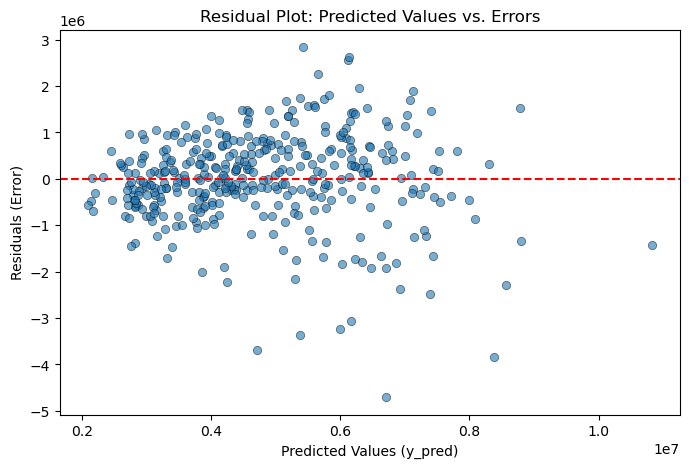

In [20]:
#13  Residual plot - plot y_pred in x axis and errors in y axis
residuals = y_train_pred - y_train

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_train_pred, y=residuals, alpha=0.6, edgecolor="k")

# Add horizontal reference line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# Labels and title
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot: Predicted Values vs. Errors")
plt.show()

In [21]:
#14  Predict on the test set
y_test_pred = regressor.predict(X_test)

# Print first few predicted values
print("First 5 Predictions on Test Set:\n", y_test_pred[:5])

First 5 Predictions on Test Set:
 [5372312.61614641 7069241.00525806 3099290.78784024 4526446.61703974
 3281573.61192656]


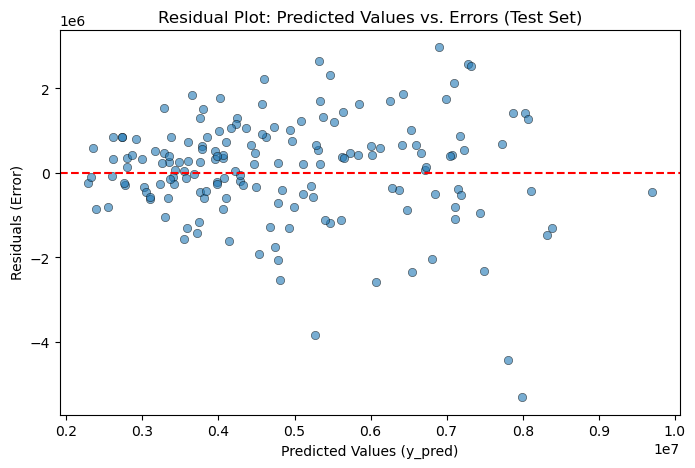

In [22]:
#15 Residual plot - plot y_pred in x axis and errors in y axis
test_residuals = y_test_pred - y_test

# Plot residuals
plt.figure(figsize=(8, 5))
sns.scatterplot(x=y_test_pred, y=test_residuals, alpha=0.6, edgecolor="k")

# Add horizontal reference line at y=0
plt.axhline(y=0, color='r', linestyle='--')

# Labels and title
plt.xlabel("Predicted Values (y_pred)")
plt.ylabel("Residuals (Error)")
plt.title("Residual Plot: Predicted Values vs. Errors (Test Set)")
plt.show()

In [23]:
#16 Print Mean Squared Error and R Squared Value
from sklearn.metrics import mean_squared_error, r2_score

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_test_pred)

# Calculate R Squared Score
r2 = r2_score(y_test, y_test_pred)

# Print results
print("Mean Squared Error (MSE):", mse)
print("R Squared Value (R²):", r2)

Mean Squared Error (MSE): 1523019469501.2913
R Squared Value (R²): 0.6463350878895877


In [26]:
#17 Check  Adjusted R Squared Value(by selecting different no of input variables insted of all)
def adjusted_r2(r2, n, k):
    """Calculate Adjusted R² given R², sample size (n), and number of predictors (k)."""
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

# Try different feature selections
feature_sets = [
    ["area", "bedrooms"],  # Select only 2 features
    ["area", "bedrooms", "bathrooms"],  # Select 3 features
    X_train.columns.tolist(),  # All features
]

for features in feature_sets:
    # Train model with selected features
    X_train_selected = X_train[features]
    X_test_selected = X_test[features]
    
    regressor.fit(X_train_selected, y_train)
    y_test_pred_selected = regressor.predict(X_test_selected)

    # Compute R² and Adjusted R²
    r2_selected = r2_score(y_test, y_test_pred_selected)
    adj_r2_selected = adjusted_r2(r2_selected, X_test_selected.shape[0], len(features))

    # Print results
    print(f"\nFeatures Used: {features}")
    print("R² Score:", r2_selected)
    print("Adjusted R² Score:", adj_r2_selected)


Features Used: ['area', 'bedrooms']
R² Score: 0.32943000309029635
Adjusted R² Score: 0.3210999410168839

Features Used: ['area', 'bedrooms', 'bathrooms']
R² Score: 0.44736815556478504
Adjusted R² Score: 0.4370063084816247

Features Used: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad_yes', 'guestroom_yes', 'basement_yes', 'hotwaterheating_yes', 'airconditioning_yes', 'prefarea_yes', 'furnishingstatus_semi-furnished', 'furnishingstatus_unfurnished']
R² Score: 0.6463350878895877
Adjusted R² Score: 0.6156841288400186
